In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv('rice_datetime.csv.csv')

In [3]:
df1.columns = ['year','rice_production']

In [4]:
df1

,year,rice_production
0,1966-01-01,1204.00
1,1967-01-01,1352.00
2,1968-01-01,757.00
3,1969-01-01,1233.40
4,1970-01-01,1340.00
5,1971-01-01,853.20
6,1972-01-01,723.60
7,1973-01-01,1734.50
8,1974-01-01,1566.10
9,1975-01-01,2087.90


In [5]:
df1.dtypes

year                object
rice_production    float64
dtype: object

In [6]:
df1['year'] = pd.to_datetime(df1['year']).dt.date

In [7]:
df1.dtypes

year               datetime64[ns]
rice_production           float64
dtype: object

In [8]:
df1.set_index('year',inplace=True)

In [9]:
df1.head()


,rice_production
year,
1966-01-01,1204.0
1967-01-01,1352.0
1968-01-01,757.0
1969-01-01,1233.4
1970-01-01,1340.0


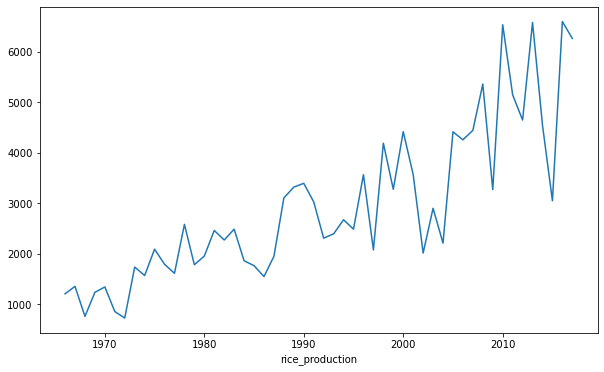

In [10]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.xlabel('year')
plt.xlabel('rice_production')
plt.plot(df1)

In [11]:
rolmean = df1.rolling(window=12).mean()
rolstd = df1.rolling(window=12).std()
print(rolmean,rolstd)

            rice_production
year                       
1966-01-01              NaN
1967-01-01              NaN
1968-01-01              NaN
1969-01-01              NaN
1970-01-01              NaN
1971-01-01              NaN
1972-01-01              NaN
1973-01-01              NaN
1974-01-01              NaN
1975-01-01              NaN
1976-01-01              NaN
1977-01-01      1354.383333
1978-01-01      1469.033333
1979-01-01      1504.700000
1980-01-01      1604.283333
1981-01-01      1706.500000
1982-01-01      1784.041667
1983-01-01      1919.966667
1984-01-01      2014.600000
1985-01-01      2016.883333
1986-01-01      2015.208333
1987-01-01      2003.550000
1988-01-01      2113.041667
1989-01-01      2255.425000
1990-01-01      2323.260833
1991-01-01      2427.104167
1992-01-01      2456.675833
1993-01-01      2451.092500
1994-01-01      2484.550833
1995-01-01      2484.609167
1996-01-01      2626.759167
1997-01-01      2652.767500
1998-01-01      2873.017500
1999-01-01      2983

Text(0.5, 1.0, 'rolling mean and std')

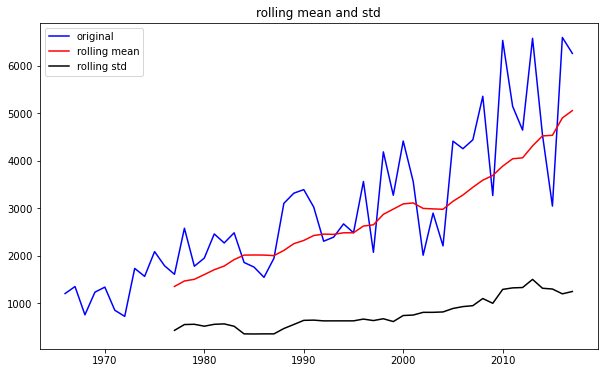

In [12]:
orig = plt.plot(df1,color="blue",label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and std')

In [13]:
from statsmodels.tsa.stattools import adfuller
print('dickey fuller test:')
dftest = adfuller(df1['rice_production'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stistic','p value','#Lags used','Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Criticl Value (%s)'%key] = value
    
print(dfoutput)

dickey fuller test:
Test Stistic                    1.438491
p value                         0.997282
#Lags used                      9.000000
Number of Observations used    42.000000
Criticl Value (1%)             -3.596636
Criticl Value (5%)             -2.933297
Criticl Value (10%)            -2.604991
dtype: float64


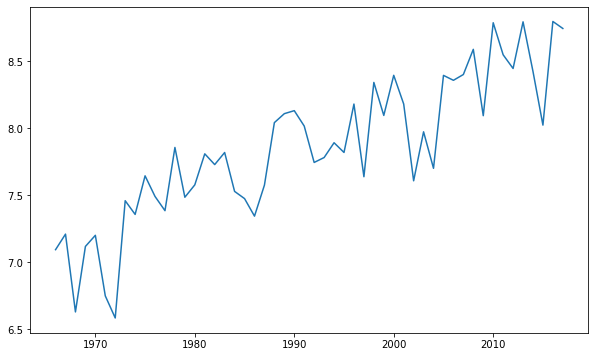

In [14]:
df_logscale = np.log(df1)
plt.plot(df_logscale)

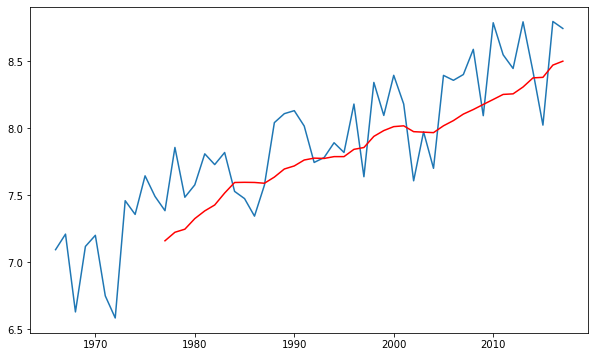

In [15]:
movingaverage = df_logscale.rolling(window=12).mean()
movingstd = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingaverage,color='red')

In [16]:
dflogscale_minusmivingaverage = df_logscale - movingaverage
dflogscale_minusmivingaverage.head(12)

dflogscale_minusmivingaverage.dropna(inplace=True)
dflogscale_minusmivingaverage.head(10)

,rice_production
year,
1977-01-01,0.224467
1978-01-01,0.632253
1979-01-01,0.238235
1980-01-01,0.251539
1981-01-01,0.425314
1982-01-01,0.301208
1983-01-01,0.302136
1984-01-01,-0.066347
1985-01-01,-0.121406


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(movingaverage,color='red',label='rolling mean')
    std = plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & std')
    
    print('results of dickey fuller test:')
    dftest  =adfuller(timeseries['rice_production'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p value','#Lags Used','Number of Observatios Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

results of dickey fuller test:
Test Statistic                -4.668567
p value                        0.000096
#Lags Used                     3.000000
Number of Observatios Used    37.000000
Critical value (1%)           -3.620918
Critical value (5%)           -2.943539
Critical value (10%)          -2.610400
dtype: float64


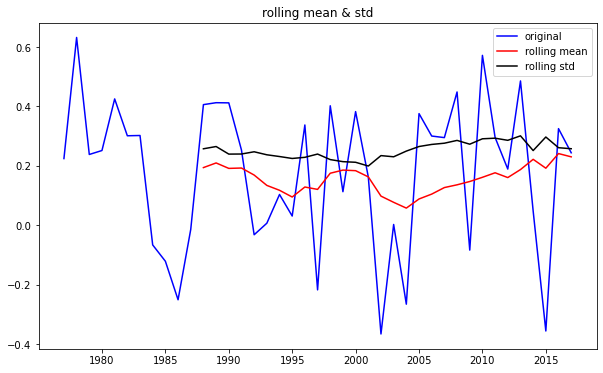

In [18]:
test_stationarity(dflogscale_minusmivingaverage)

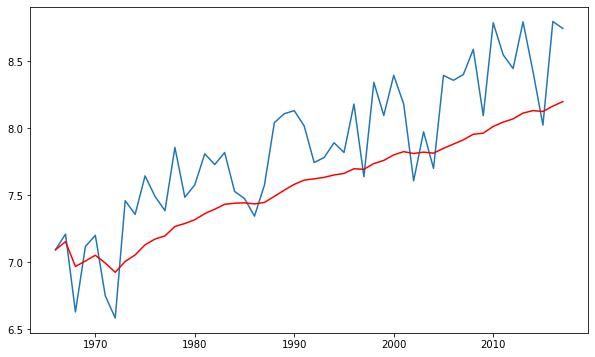

In [19]:
exponentialweighteddecayaverage = df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialweighteddecayaverage,color='red')

results of dickey fuller test:
Test Statistic                -3.685160
p value                        0.004327
#Lags Used                     3.000000
Number of Observatios Used    48.000000
Critical value (1%)           -3.574589
Critical value (5%)           -2.923954
Critical value (10%)          -2.600039
dtype: float64


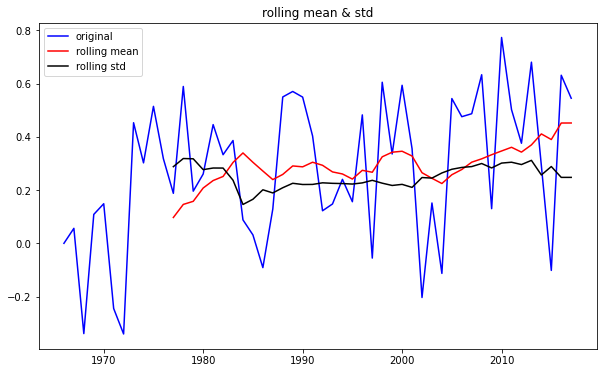

In [20]:
datalogscaleminusmovingexponentialdecayaverage = df_logscale - exponentialweighteddecayaverage
test_stationarity(datalogscaleminusmovingexponentialdecayaverage)

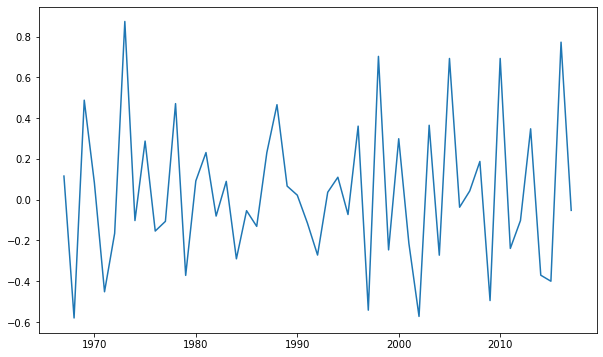

In [21]:
dflogdiffshifting = df_logscale - df_logscale.shift()
plt.plot(dflogdiffshifting)

results of dickey fuller test:
Test Statistic                -4.821924
p value                        0.000049
#Lags Used                     4.000000
Number of Observatios Used    46.000000
Critical value (1%)           -3.581258
Critical value (5%)           -2.926785
Critical value (10%)          -2.601541
dtype: float64


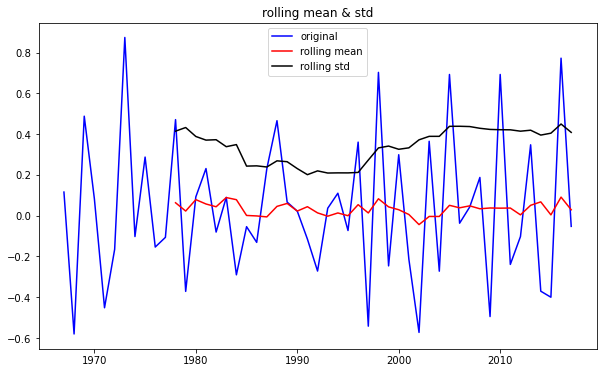

In [22]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

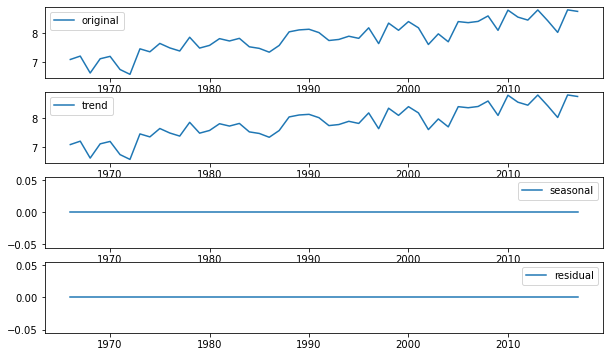

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


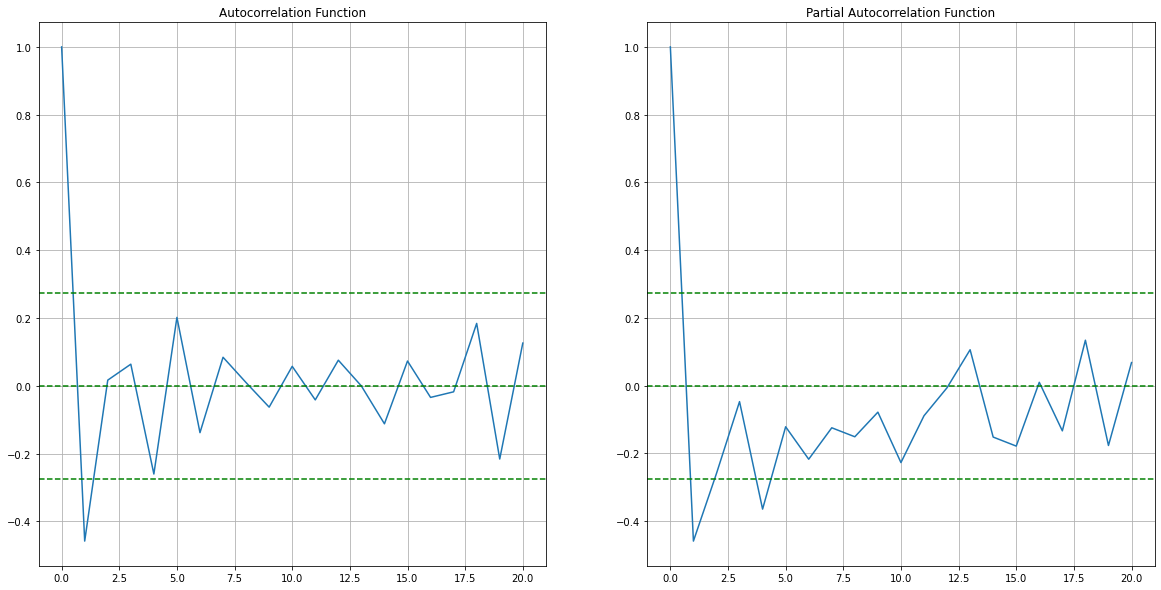

In [24]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dflogdiffshifting, nlags=20)
lag_pacf=pacf(dflogdiffshifting, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.grid()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.grid()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN 

plotting AR MODEL


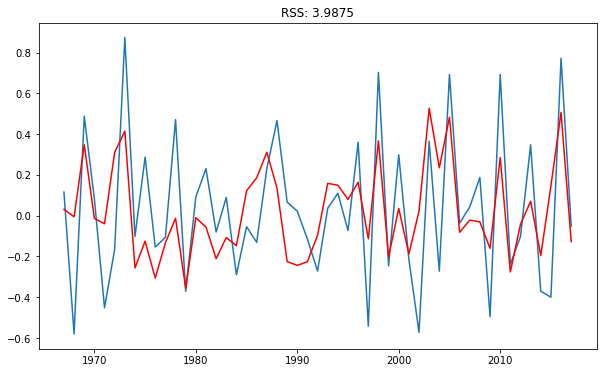

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dflogdiffshifting['rice_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


plotting AR MODEL


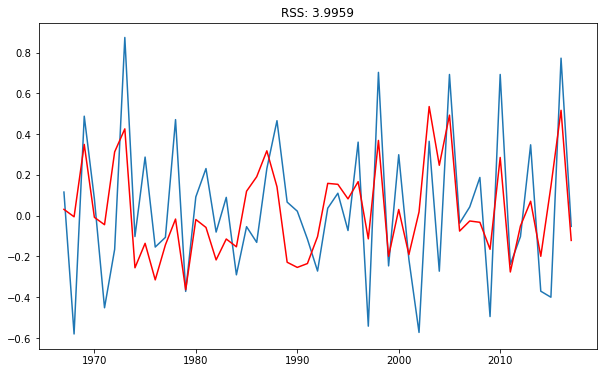

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-dflogdiffshifting['rice_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import

plotting AR MODEL


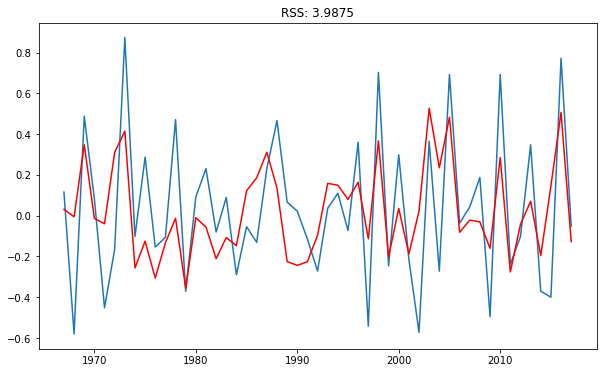

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-dflogdiffshifting['rice_production'])**2))
print('plotting AR MODEL')

In [28]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_arima_diff.head()

year
1967-01-01    0.031196
1968-01-01   -0.005303
1969-01-01    0.348180
1970-01-01   -0.013081
1971-01-01   -0.039582
dtype: float64

In [29]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

year
1967-01-01    0.031196
1968-01-01    0.025893
1969-01-01    0.374074
1970-01-01    0.360992
1971-01-01    0.321410
dtype: float64

In [30]:
predictions_arima_log = pd.Series(df_logscale.iloc[:, 0],index=df_logscale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value = 0)
predictions_arima_log.head()

year
1966-01-01    7.093405
1967-01-01    7.240536
1968-01-01    6.655256
1969-01-01    7.491603
1970-01-01    7.561417
dtype: float64

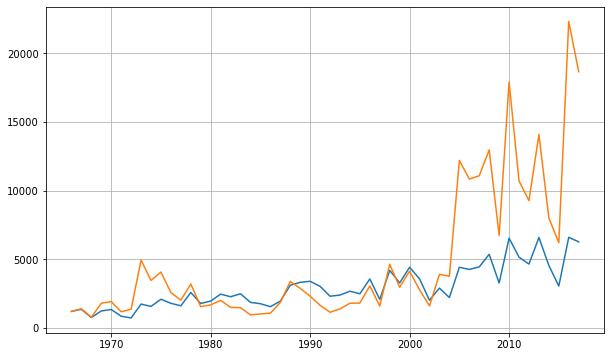

In [31]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(df1)
plt.plot(predictions_arima)
plt.grid()

In [32]:
df_logscale

,rice_production
year,
1966-01-01,7.093405
1967-01-01,7.209340
1968-01-01,6.629363
1969-01-01,7.117530
1970-01-01,7.200425
1971-01-01,6.748994
1972-01-01,6.584239
1973-01-01,7.458474
1974-01-01,7.356344


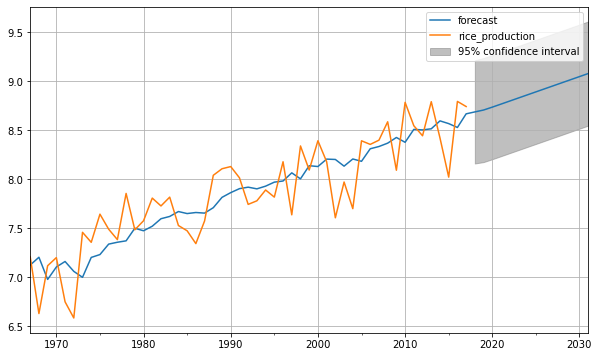

In [33]:
results_ARIMA.plot_predict(1,65)
plt.grid()

In [34]:
x = results_ARIMA.forecast(steps=120)

In [73]:
def iterative_ARIMA_fit(series):

    ARIMA_fit_results = {}
    for AR in ARrange:
        for MA in MArange :
            for Diff in Diffrange:
                model = ARIMA(series, order = (AR,Diff,MA))
                fit_is_available = False
                results_ARIMA = None
                try:
                    results_ARIMA = model.fit(disp = -1, method = 'css')
                    fit_is_available = True
                except:
                    continue
                if fit_is_available:
                    safe_RSS = get_safe_RSS(series, results_ARIMA.fittedvalues)
                    ARIMA_fit_results['%d-%d-%d' % (AR,Diff,MA)]=[safe_RSS,results_ARIMA]

    return ARIMA_fit_results

In [74]:
def get_best_ARIMA_model_fit(series):

    if t.isstationary(series)[0]:
        ARIMA_fit_results = iterative_ARIMA_fit(series)
        best_ARIMA = min(ARIMA_fit_results, key = ARIMA_fit_results.get)
        
        return ARIMA_fit_results[best_ARIMA]

In [75]:
def get_safe_RSS(series, fitted_values):
    fitted_values_copy = fitted_values  # original fit is left untouched
    missing_index = list(set(series.index).difference(set(fitted_values_copy.index)))
    if missing_index:
        nan_series = pd.Series(index = pd.to_datetime(missing_index))
        fitted_values_copy = fitted_values_copy.append(nan_series)
        fitted_values_copy.sort_index(inplace = True)
        fitted_values_copy.fillna(method = 'bfill', inplace = True)  # fill holes
        fitted_values_copy.fillna(method = 'ffill', inplace = True)
    return sum((fitted_values_copy - series)**2)

In [76]:
df1.size

52